In [1]:
import random
import numpy as np
import networkx as nx
import itertools


In [2]:
def reliability(n,A,p):
    n_exp = 1000
    n_s = 0
    for i in range(n_exp):
        Arand=np.random.rand(n,n)
        #print(Arand)
        Arand=np.where(Arand<p,A,0)
        #print(Arand)
        G = nx.from_numpy_array(Arand)
        if nx.is_connected(G):
            n_s += 1
    R = n_s/n_exp
    print(R)   

In [12]:
A=np.array([[0,1,0,0,1],[1,0,1,1,1],[0,1,0,1,0],[0,1,1,0,1],[1,1,0,1,0]])
n = 5
p=0.7
reliability(n,A,p)

0.979


False

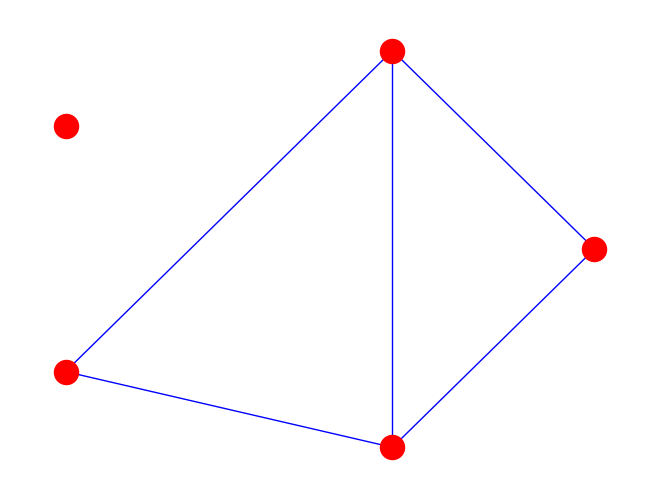

In [18]:
B=np.array([[0,1,0,0,1],[1,0,0,1,1],[0,0,0,0,0],[0,1,0,0,1],[1,1,0,1,0]])
T = nx.from_numpy_array(B)
nx.draw(T, pos=nx.circular_layout(T), node_color='r', edge_color='b')
nx.is_connected(T)

0.791
[[0 1 1 0 0]
 [1 0 1 1 1]
 [1 1 0 0 1]
 [0 1 0 0 0]
 [0 1 1 0 0]]


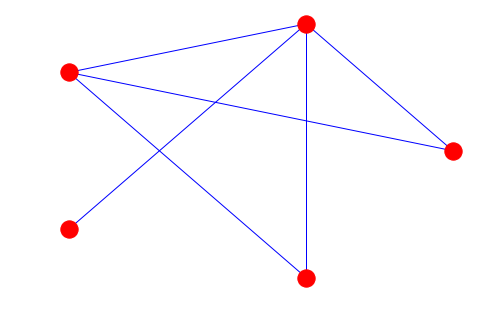

In [5]:
G = nx.generators.random_graphs.dense_gnm_random_graph(5,6)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')
Y = nx.adjacency_matrix(G)
Y=Y.todense()
reliability(5,Y,0.6)
print(Y)

In [8]:
import networkx as nx
import itertools

def generate_all_possible_networks(num_nodes, num_edges):
    nodes = range(num_nodes)
    all_edges = list(itertools.combinations(nodes, 2))
    all_networks = []
    for i in range(num_edges + 1):
        for comb in itertools.combinations(all_edges, num_edges):
            G = nx.Graph()
            G.add_nodes_from(nodes)
            G.add_edges_from(comb)
            all_networks.append(G)
    return all_networks

# Example usage
num_nodes = 5
num_edges = 6
all_networks = generate_all_possible_networks(num_nodes, num_edges)
#for network in all_networks:
  #  print(nx.adjacency_matrix(network).todense())


In [13]:
for network in all_networks:
    z=nx.adjacency_matrix(network).todense()
    print(reliability(5,z,0.6))
    

0.796
None
0.801
None
0.779
None
0.782
None
0.865
None
0.777
None
0.787
None
0.857
None
0.778
None
0.866
None
0.783
None
0.784
None
0.786
None
0.783
None
0.789
None
0.777
None
0.0
None
0.785
None
0.799
None
0.813
None
0.8
None
0.905
None
0.804
None
0.749
None
0.902
None
0.77
None
0.887
None
0.801
None
0.782
None
0.787
None
0.88
None
0.886
None
0.89
None
0.9
None
0.783
None
0.785
None
0.805
None
0.801
None
0.877
None
0.778
None
0.0
None
0.755
None
0.798
None
0.89
None
0.79
None
0.892
None
0.798
None
0.776
None
0.907
None
0.913
None
0.891
None
0.792
None
0.9
None
0.79
None
0.79
None
0.788
None
0.79
None
0.88
None
0.799
None
0.789
None
0.899
None
0.774
None
0.882
None
0.791
None
0.847
None
0.922
None
0.885
None
0.882
None
0.891
None
0.874
None
0.778
None
0.779
None
0.903
None
0.793
None
0.9
None
0.79
None
0.785
None
0.914
None
0.879
None
0.894
None
0.771
None
0.796
None
0.0
None
0.872
None
0.776
None
0.795
None
0.89
None
0.789
None
0.797
None
0.789
None
0.78
None
0.868
None
0.783
None
0.7

KeyboardInterrupt: 